# Correlation of large diff regions with age in Microglia

In [1]:
import cooler
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import seaborn as sns

In [2]:
downsample_dir = Path(
    "/tscc/projects/ps-epigen/users/biy022/scmethylhic/"
    "human_hippocampus/snm3c/Combined/hic/downsampled"
)

## Load data

In [3]:
# load large diff regions
micro1_100k_dataset = cooler.Cooler(
    str(downsample_dir / "MicroSubtypes" / "large_diff_coordinates" / "Merged_100k_65e-5_1e7_h_Micro1.cool"))
micro2_100k_dataset = cooler.Cooler(
    str(downsample_dir / "MicroSubtypes" / "large_diff_coordinates" / "Merged_100k_65e-5_1e7_h_Micro2.cool"))

In [4]:
# load age data
micro_Y1_dataset = cooler.Cooler(str(downsample_dir / "Micro" / "Micro_20-40.mcool::/resolutions/100000"))
micro_Y2_dataset = cooler.Cooler(str(downsample_dir / "Micro" / "Micro_40-60.mcool::/resolutions/100000"))
micro_O1_dataset = cooler.Cooler(str(downsample_dir / "Micro" / "Micro_60-80.mcool::/resolutions/100000"))
micro_O2_dataset = cooler.Cooler(str(downsample_dir / "Micro" / "Micro_80-100.mcool::/resolutions/100000"))

## Extract diff regions

In [5]:
micro_Y1_df = pd.merge(
    micro_Y1_dataset.pixels()[:],
    micro1_100k_dataset.pixels()[:].loc[:, ["bin1_id", "bin2_id"]],
    on=["bin1_id", "bin2_id"]
)
micro_Y1_df["group"] = "Y1"

In [6]:
micro_Y2_df = pd.merge(
    micro_Y2_dataset.pixels()[:],
    micro1_100k_dataset.pixels()[:].loc[:, ["bin1_id", "bin2_id"]],
    on=["bin1_id", "bin2_id"]
)
micro_Y2_df["group"] = "Y2"

In [7]:
micro_O1_df = pd.merge(
    micro_O1_dataset.pixels()[:],
    micro1_100k_dataset.pixels()[:].loc[:, ["bin1_id", "bin2_id"]],
    on=["bin1_id", "bin2_id"]
)
micro_O1_df["group"] = "O1"

In [8]:
micro_O2_df = pd.merge(
    micro_O2_dataset.pixels()[:],
    micro1_100k_dataset.pixels()[:].loc[:, ["bin1_id", "bin2_id"]],
    on=["bin1_id", "bin2_id"]
)
micro_O2_df["group"] = "O2"

In [9]:
micro_plot_table = pd.concat([
    micro_Y1_df.loc[:, ["count"]],
    micro_Y2_df.loc[:, ["count"]],
    micro_O1_df.loc[:, ["count"]],
    micro_O2_df.loc[:, ["count"]]
], axis=1)
micro_plot_table.columns = ["Y1", "Y2", "O1", "O2"]

In [10]:
micro_plot_table = micro_plot_table.subtract(
    micro_plot_table.mean(axis=1), axis=0).div(micro_plot_table.std(axis=1), axis=0)

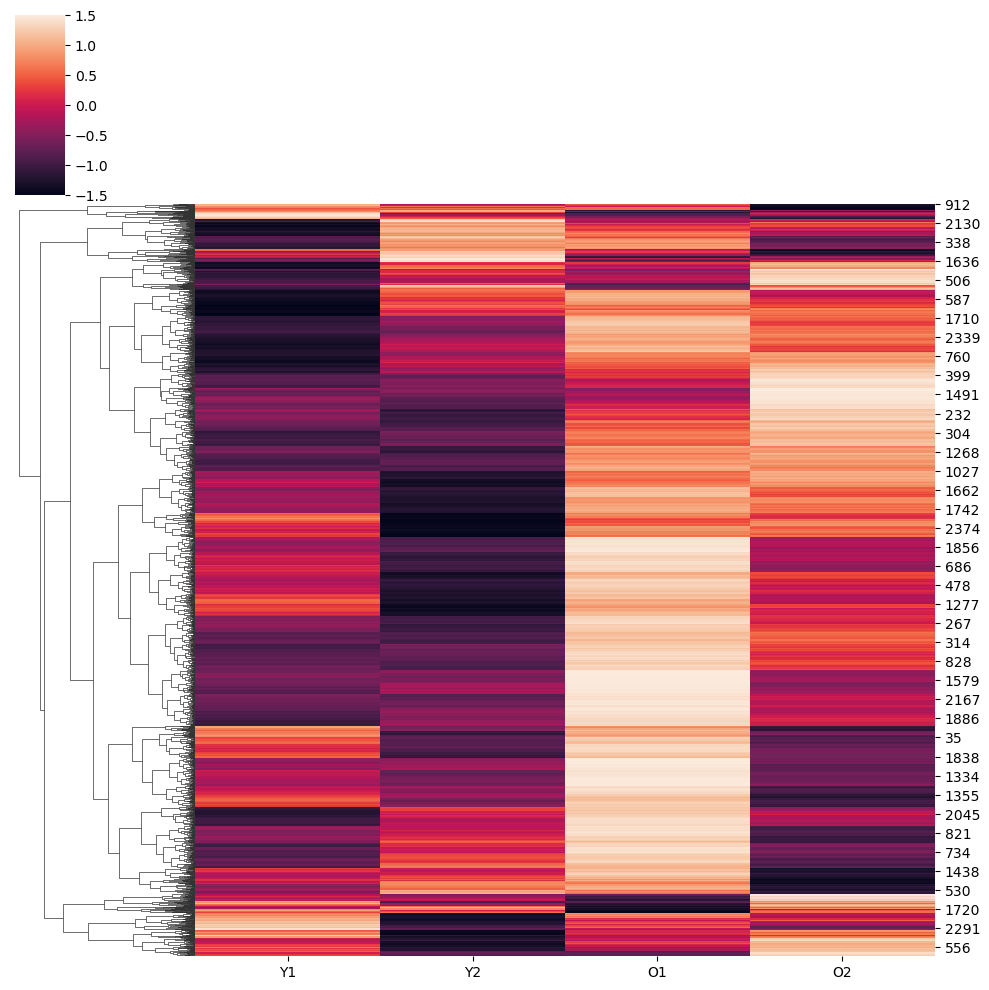

In [11]:
sns.clustermap(micro_plot_table, col_cluster=False)